<a href="https://colab.research.google.com/github/gustavonepomucenocosta/Prova/blob/main/ListaExercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Projeto Final – Análise Contábil com Ajuste Econômico

Este projeto tem como objetivo integrar análise de dados contábeis de empresas com indicadores econômicos, utilizando Python, Pandas, Ipeadata e Streamlit.

1) Configure o título na barra do navegador, da página do projeto no Streamlit e descrição inicial do projeto (peso: 1,0)

- Título na barra (`page_title`): Lista de Exercícios 4
- Título da página (`header`): Projeto Final – Análise Contábil com Ajuste Econômico
- Descrição projeto (`write`): Este projeto tem como objetivo integrar análise de dados contábeis de empresas com indicadores econômicos, utilizando Python, Pandas, Ipeadata e Streamlit.

2) Importe os dados do arquivo empresas_dados.csv utilizando pandas e apresente todas as linhas da df (peso: 1,0)

Dica: Utilize `head(len(df))`

In [ ]:
import pandas as pd

df = pd.read_csv('empresas_dados.csv')

df.head(len(df))

,Empresa;Ano;Receita Líquida;Lucro Líquido;Ativo Total;Setor;UF
0,Empresa A;2010;177521863;24817338.56;235183611...
1,Empresa A;2011;183120466;11902141.28;287022856...
2,Empresa A;2012;141090292;19776238.48;249230083...
3,Empresa A;2013;138409749;8091674324;246037033....
4,Empresa A;2014;54521373;4462621628;73356325.09...
5,Empresa A;2015;156328085;7982103544;190477945....
6,Empresa A;2016;156406362;22174970.9;205141816....
7,Empresa A;2017;129757501;8251404728;219901179....
8,Empresa A;2018;82049003;10431313.6;137344423.4...
9,Empresa A;2019;105831368;6324243261;207335125....


3) Calcule os indicadores Margem Líquida e ROA e salve como novas coluna da df. Depois apresente os dois indicadores no mesmo gráfico de linhas, agrupado por Ano  (peso: 1,0)

- Margem Líquida = Lucro Líquido / Receita Líquida * 100
- ROA = Lucro Líquido / Ativo Total *  100

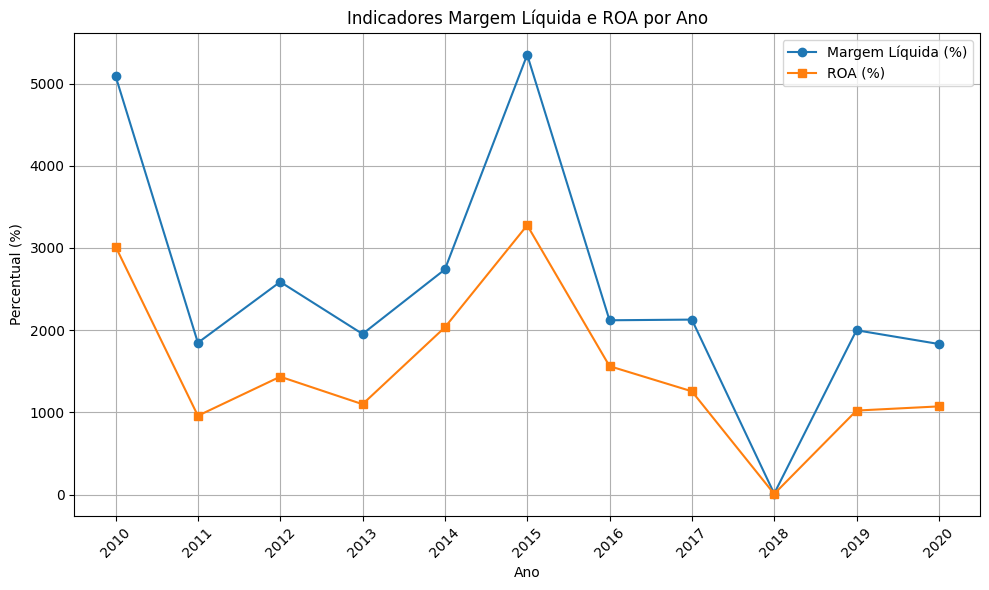

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("empresas_dados.csv", sep=";")

df["Margem Líquida (%)"] = (df["Lucro Líquido"] / df["Receita Líquida"]) * 100
df["ROA (%)"] = (df["Lucro Líquido"] / df["Ativo Total"]) * 100

df_agrupado = df.groupby("Ano")[["Margem Líquida (%)", "ROA (%)"]].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_agrupado["Ano"], df_agrupado["Margem Líquida (%)"], marker='o', label="Margem Líquida (%)")
plt.plot(df_agrupado["Ano"], df_agrupado["ROA (%)"], marker='s', label="ROA (%)")
plt.title("Indicadores Margem Líquida e ROA por Ano")
plt.xlabel("Ano")
plt.ylabel("Percentual (%)")
plt.legend()
plt.grid(True)
plt.xticks(df_agrupado["Ano"], rotation=45)
plt.tight_layout()
plt.show()



4) Utilize o pacote ipeadatapy e faça busca para encontrar o indicador que traga o IPCA, taxa de variação, em % e anual: (peso: 2,0)

- Baixe os dados no período de 2010 a 2024
- Altere o nome da coluna "YEAR" para "Ano"
- Altere o nome da coluna "VALUE ((% a.a.))" para "IPCA"
- Apresente a df para checar se tudo deu certo

In [ ]:

!pip install ipeadatapy

import ipeadatapy as ip

ip.list_series("IPCA")

ip.describe('PRECOS_IPCAG')


,IPCA - taxa de variação
Name,IPCA - taxa de variação
Code,PRECOS_IPCAG
Big Theme,Macroeconômico
Theme code,9
Source,Instituto Brasileiro de Geografia e Estatístic...
Source acronym,IBGE/SNIPC
Comment,O Índice Nacional de Preços ao Consumidor Ampl...
Last update,2025-01-10T17:00:00.673-03:00
Frequency,Anual
Measure,(% a.a.)


In [ ]:
df1 = ip.timeseries('PRECOS_IPCAG', yearGreaterThan=2000, yearSmallerThan=2025)
df1.rename(columns={'YEAR': 'ano', 'VALUE ((% a.a.))': 'IPCA'}, inplace=True)
df1

,CODE,RAW DATE,DAY,MONTH,ano,IPCA
DATE,,,,,,
2001-01-01,PRECOS_IPCAG,2001-01-01T00:00:00-02:00,1,1,2001,7.673436
2002-01-01,PRECOS_IPCAG,2002-01-01T00:00:00-02:00,1,1,2002,12.530273
2003-01-01,PRECOS_IPCAG,2003-01-01T00:00:00-02:00,1,1,2003,9.300513
2004-01-01,PRECOS_IPCAG,2004-01-01T00:00:00-02:00,1,1,2004,7.599496
2005-01-01,PRECOS_IPCAG,2005-01-01T00:00:00-02:00,1,1,2005,5.689227
2006-01-01,PRECOS_IPCAG,2006-01-01T00:00:00-02:00,1,1,2006,3.141516
2007-01-01,PRECOS_IPCAG,2007-01-01T00:00:00-02:00,1,1,2007,4.457659
2008-01-01,PRECOS_IPCAG,2008-01-01T00:00:00-02:00,1,1,2008,5.902724
2009-01-01,PRECOS_IPCAG,2009-01-01T00:00:00-02:00,1,1,2009,4.311650


5) Combine as duas df (Excel e IPEA) em uma nova df e calcule nova coluna chamada Receita Real (peso: 2,0)

- Utilize a função `pd.merge()` para unificar as duas df utiilizando a coluna Ano como conexão (chave primária) entre elas
- Crie nova coluna chamada Receita Real que será o resultado da Receita Líquida de cada ano deduzido o IPCA do ano: `Receita Real = Receitta Líquida - ( Receita Líquida * (IPCA/100) )`
- Apresente a nova df combinada


In [ ]:
df_2 = pd.merge(df, df1[['ano', 'IPCA']], left_on='Ano', right_on='ano', how='left')

df_2['Receita Real'] = df_2['Receita Líquida'] - (df_2['Receita Líquida'] * (df_2['IPCA'] / 100))


df_2.drop(columns='ano', inplace=True)

df_2



,Empresa,Ano,Receita Líquida,Lucro Líquido,Ativo Total,Setor,UF,Margem Líquida (%),ROA (%),IPCA,Receita Real
0,Empresa A,2010,177521863,2.481734e+07,2.351836e+08,Indústria,SP,13.979877,10.552325,5.908689,1.670326e+08
1,Empresa A,2011,183120466,1.190214e+07,2.870229e+08,Indústria,SP,6.499624,4.146757,6.503353,1.712115e+08
2,Empresa A,2012,141090292,1.977624e+07,2.492301e+08,Indústria,SP,14.016725,7.934932,5.838595,1.328526e+08
3,Empresa A,2013,138409749,8.091674e+09,2.460370e+08,Indústria,SP,5846.173685,3288.803395,5.910683,1.302288e+08
4,Empresa A,2014,54521373,4.462622e+09,7.335633e+07,Indústria,SP,8185.086660,6083.485811,6.407471,5.102793e+07
5,Empresa A,2015,156328085,7.982104e+09,1.904779e+08,Indústria,SP,5105.994578,4190.565743,10.673028,1.396431e+08
6,Empresa A,2016,156406362,2.217497e+07,2.051418e+08,Indústria,SP,14.177793,10.809581,6.287988,1.465715e+08
7,Empresa A,2017,129757501,8.251405e+09,2.199012e+08,Indústria,SP,6359.096518,3752.323992,2.947421,1.259330e+08
8,Empresa A,2018,82049003,1.043131e+07,1.373444e+08,Indústria,SP,12.713517,7.595003,3.745581,7.897579e+07
9,Empresa A,2019,105831368,6.324243e+09,2.073351e+08,Indústria,SP,5975.773894,3050.251739,4.306152,1.012741e+08


6) Crie gráfico de linha que apresente as variáveis Receita Líquida e Receita Real ao longo dos anos (no mesmo gráfico) (peso: 1,0)

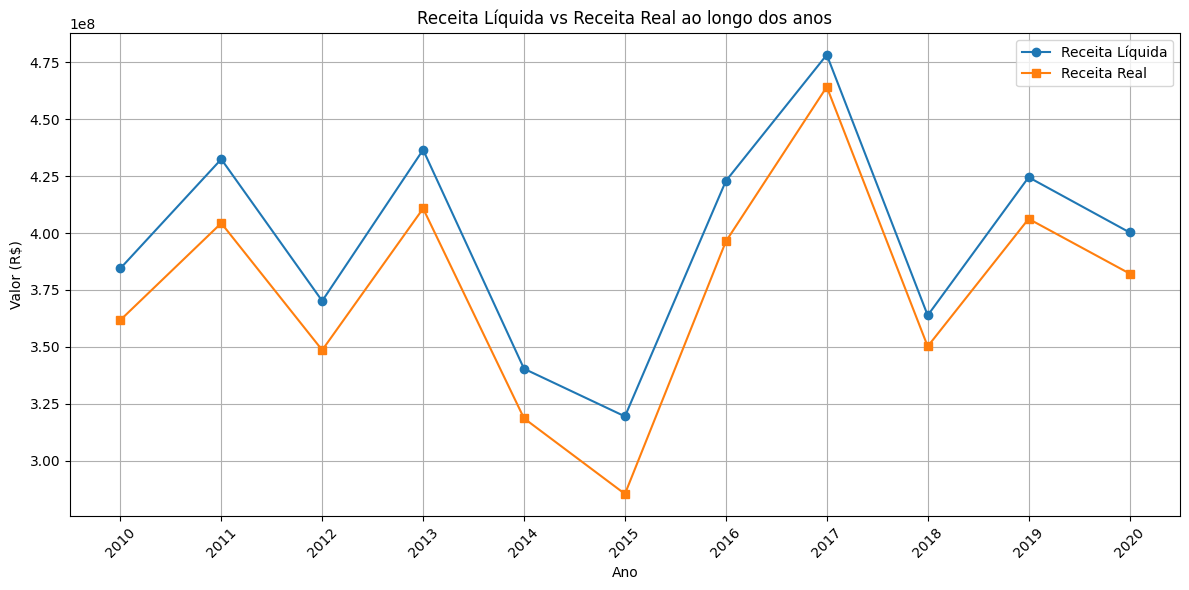

In [ ]:
import matplotlib.pyplot as plt

df_plot = df_2.groupby('Ano')[['Receita Líquida', 'Receita Real']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(df_plot['Ano'], df_plot['Receita Líquida'], label='Receita Líquida', marker='o')
plt.plot(df_plot['Ano'], df_plot['Receita Real'], label='Receita Real', marker='s')

plt.title('Receita Líquida vs Receita Real ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Valor (R$)')
plt.legend()
plt.grid(True)
plt.xticks(df_plot['Ano'], rotation=45)
plt.tight_layout()
plt.show()



7) Faça os ajustes necessários e leve este projeto para a web usando GitHub e Streamlit (peso: 2,0)

- Caça os ajustes necessários no projeto para ser publicado no Streamlit
- Crie novo repositório público no GitHub e leve os arquivos .py e .csv pra lá. Aproveite e crie o arquivo requirements.txt com os pacotes utilizados no projeto
- Crie novo projeto no Streamlit e associe ao repositório da lista